In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def generate_weights_biases(num_in_features, num_out_features):
    np.random.seed(0)
    weights = np.random.rand(num_in_features, num_out_features)
    return weights

# Accelerated Gradient Descent

Epoch 0, Loss: 0.7627769104532394
Epoch 1000, Loss: 0.0012271396747349122
Epoch 2000, Loss: 0.0008987674047770365
Epoch 3000, Loss: 0.0007813430097058165
Epoch 4000, Loss: 0.0007105204608589581
Epoch 5000, Loss: 0.0006560764237126486
Epoch 6000, Loss: 0.0006080833829474016
Epoch 7000, Loss: 0.0005659178748382369
Epoch 8000, Loss: 0.0005290195374901608
Epoch 9000, Loss: 0.0004958546533882602
Epoch 10000, Loss: 0.0004651484998436677
Epoch 11000, Loss: 0.0004364142695626712
Epoch 12000, Loss: 0.0004097516354498479
Epoch 13000, Loss: 0.00038531984572313103
Epoch 14000, Loss: 0.000363086164778431
Epoch 15000, Loss: 0.0003428645004803011
Epoch 16000, Loss: 0.00032441734213715847
Epoch 17000, Loss: 0.0003075248323147088
Epoch 18000, Loss: 0.0002920139856255231
Epoch 19000, Loss: 0.00027775729487910746

--- Huấn luyện hoàn tất! ---
Input: [0 0] -> Dự đoán: 0.0000 (Nhãn thật: 0)
Input: [0 1] -> Dự đoán: 0.9997 (Nhãn thật: 1)
Input: [1 0] -> Dự đoán: 0.9997 (Nhãn thật: 1)
Input: [1 1] -> Dự đoán

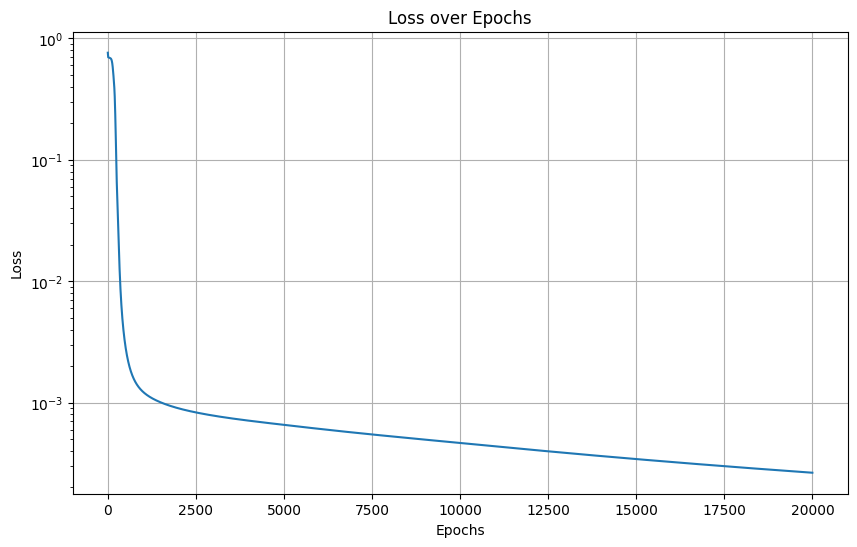

In [ ]:
def train_nag(X, y, n_hidden, epochs, lr):
    # Lấy số lượng mẫu và số đặc trưng
    n_samples, n_features = X.shape
    
    # Khởi tạo trọng số và bias một cách ngẫu nhiên
    np.random.seed(42)
    # Trọng số và bias cho lớp ẩn
    w1 = np.random.randn(n_features, n_hidden)
    b1 = np.zeros((1, n_hidden))
    # Trọng số và bias cho lớp đầu ra
    w2 = np.random.randn(n_hidden, 1)
    b2 = np.zeros((1, 1))
    
    # --- KHỞI TẠO CÁC BIẾN VẬN TỐC (MOMENTUM) ---
    v_w1 = np.zeros_like(w1)
    v_b1 = np.zeros_like(b1)
    v_w2 = np.zeros_like(w2)
    v_b2 = np.zeros_like(b2)
    
    losses = []

    for i in range(epochs):
        # Tính toán trọng số và bias tạm thời bằng cách đi một bước theo đà cũ
        w1_lookahead = w1 - (i - 1) / (i + 2) * v_w1
        b1_lookahead = b1 - (i - 1) / (i + 2) * v_b1
        w2_lookahead = w2 - (i - 1) / (i + 2) * v_w2
        b2_lookahead = b2 - (i - 1) / (i + 2) * v_b2

        # --- FORWARD PASS (Trên các tham số "nhìn trước") ---
        # Lớp ẩn
        hidden_layer_input = np.dot(X, w1_lookahead) + b1_lookahead
        hidden_layer_output = sigmoid(hidden_layer_input)
        
        # Lớp đầu ra
        output_layer_input = np.dot(hidden_layer_output, w2_lookahead) + b2_lookahead
        predicted_output = sigmoid(output_layer_input)
        
        # Tính toán loss (Binary Cross-Entropy)
        loss = -np.mean(y * np.log(predicted_output) + (1 - y) * np.log(1 - predicted_output))
        losses.append(loss)
        
        # --- BACKWARD PASS (Tính toán gradient tại vị trí "nhìn trước") ---
        # Gradient cho lớp đầu ra
        d_predicted_output = (predicted_output - y) / n_samples
        d_output_layer_input = d_predicted_output * sigmoid_derivative(output_layer_input)
        
        # Gradient cho trọng số và bias của lớp đầu ra
        dw2 = np.dot(hidden_layer_output.T, d_output_layer_input)
        db2 = np.sum(d_output_layer_input, axis=0, keepdims=True)

        # Gradient cho lớp ẩn
        d_hidden_layer_output = np.dot(d_output_layer_input, w2_lookahead.T)
        d_hidden_layer_input = d_hidden_layer_output * sigmoid_derivative(hidden_layer_input)
        
        # Gradient cho trọng số và bias của lớp ẩn
        dw1 = np.dot(X.T, d_hidden_layer_input)
        db1 = np.sum(d_hidden_layer_input, axis=0, keepdims=True)

        # --- BƯỚC 2: CẬP NHẬT VẬN TỐC (MOMENTUM) ---
        v_w1 = ((i - 1) / (i + 2) * v_w1) + (lr * dw1)
        v_b1 = ((i - 1) / (i + 2) * v_b1) + (lr * db1)
        v_w2 = ((i - 1) / (i + 2) * v_w2) + (lr * dw2)
        v_b2 = ((i - 1) / (i + 2) * v_b2) + (lr * db2)

        # --- BƯỚC 3: CẬP NHẬT TRỌNG SỐ THẬT ---
        # Cập nhật trọng số thật bằng vận tốc mới
        w1 -= v_w1
        b1 -= v_b1
        w2 -= v_w2
        b2 -= v_b2

        if i % 1000 == 0:
            print(f"Epoch {i}, Loss: {loss}")
            
    # Trả về các tham số đã huấn luyện và lịch sử loss
    trained_params = {"w1": w1, "b1": b1, "w2": w2, "b2": b2}
    return trained_params, losses

# --- CHUẨN BỊ DỮ LIỆU VÀ HUẤN LUYỆN ---
# Dữ liệu cho bài toán XOR
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

# Thiết lập các siêu tham số
n_hidden_nodes = 4
learning_rate = 0.5
training_epochs = 20000

# Huấn luyện mô hình
params, loss_history = train_nag(X_xor, y_xor, n_hidden_nodes, training_epochs, learning_rate)

# --- IN KẾT QUẢ VÀ VẼ ĐỒ THỊ ---
print("\n--- Huấn luyện hoàn tất! ---")

# Hàm dự đoán
def predict(X, params):
    hidden_input = np.dot(X, params["w1"]) + params["b1"]
    hidden_output = sigmoid(hidden_input)
    output_input = np.dot(hidden_output, params["w2"]) + params["b2"]
    return sigmoid(output_input)

# In kết quả dự đoán
predictions = predict(X_xor, params)
for i in range(len(X_xor)):
    print(f"Input: {X_xor[i]} -> Dự đoán: {predictions[i][0]:.4f} (Nhãn thật: {y_xor[i][0]})")

# Vẽ đồ thị loss
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.yscale('log')
plt.show()

# Stochastic Gradient Descent

Epoch 0, Loss: 0.7198
Epoch 1000, Loss: 0.6967
Epoch 2000, Loss: 0.6965
Epoch 3000, Loss: 0.6963
Epoch 4000, Loss: 0.6961
Epoch 5000, Loss: 0.6958
Epoch 6000, Loss: 0.6952
Epoch 7000, Loss: 0.6940
Epoch 8000, Loss: 0.6898
Epoch 9000, Loss: 0.6703
Epoch 10000, Loss: 0.5828
Epoch 11000, Loss: 0.3887
Epoch 12000, Loss: 0.1274
Epoch 13000, Loss: 0.0765
Epoch 14000, Loss: 0.0572
Epoch 15000, Loss: 0.0467
Epoch 16000, Loss: 0.0401
Epoch 17000, Loss: 0.0354
Epoch 18000, Loss: 0.0319
Epoch 19000, Loss: 0.0292
Epoch 20000, Loss: 0.0270
Epoch 21000, Loss: 0.0252
Epoch 22000, Loss: 0.0237
Epoch 23000, Loss: 0.0224
Epoch 24000, Loss: 0.0212
Epoch 25000, Loss: 0.0202
Epoch 26000, Loss: 0.0193
Epoch 27000, Loss: 0.0186
Epoch 28000, Loss: 0.0179
Epoch 29000, Loss: 0.0172

--- Final Results ---
Input: [0 0], Expected: 0, Predicted: 0, Xác Suất: 0.0170
Input: [1 0], Expected: 1, Predicted: 1, Xác Suất: 0.9837
Input: [0 1], Expected: 1, Predicted: 1, Xác Suất: 0.9830
Input: [1 1], Expected: 0, Predicted

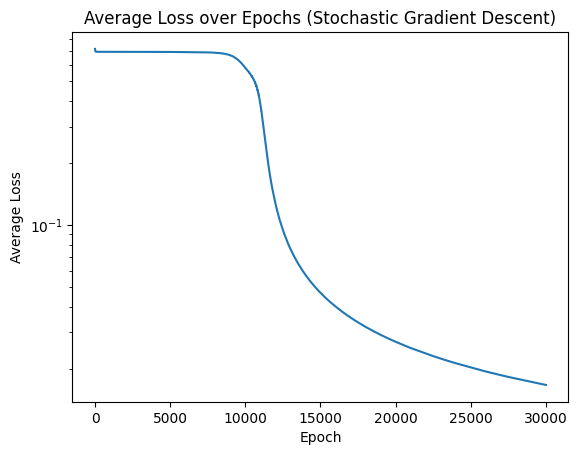

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Các hàm sigmoid và đạo hàm sigmoid (giữ nguyên)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Hàm khởi tạo trọng số (giữ nguyên)
def generate_weights_biases(num_in_features, num_out_features):
    np.random.seed(0)
    # Khởi tạo trọng số từ -1 đến 1
    return 2 * np.random.rand(num_in_features, num_out_features) - 1

def XOR_train_SGD(x_mau, y_mau, epochs, lr):
    num_samples = x_mau.shape[0]

    # Khởi tạo trọng số
    # Thêm 1 cho bias
    w1 = generate_weights_biases(3, x_mau.shape[1] + 1)
    w2 = generate_weights_biases(3, 3)
    w3 = generate_weights_biases(1, 3)

    epoch_losses = [] # Lưu lại loss trung bình của mỗi epoch

    for epoch in range(epochs):
        
        # --- THAY ĐỔI: Xáo trộn dữ liệu ở đầu mỗi epoch ---
        # Đây là bước quan trọng trong SGD để tránh việc mô hình học thứ tự của dữ liệu
        permutation = np.random.permutation(num_samples)
        x_shuffled = x_mau[permutation]
        y_shuffled = y_mau[permutation]
        
        current_epoch_loss = 0

        # --- THAY ĐỔI: Vòng lặp qua TỪNG mẫu dữ liệu ---
        for i in range(num_samples):
            # Lấy ra một mẫu duy nhất
            x_sample = x_shuffled[i]
            y_target_sample = y_shuffled[i]

            # Thêm bias và định hình lại để tính toán (reshape to column vector)
            x_in = np.hstack(([1], x_sample)).reshape(-1, 1)

            # --- FORWARD PASS cho một mẫu ---
            n1 = np.dot(w1, x_in)
            H1 = sigmoid(n1)
            
            n2 = np.dot(w2, H1)
            H2 = sigmoid(n2)

            n3 = np.dot(w3, H2)
            H3 = sigmoid(n3)

            # Tính loss cho mẫu hiện tại và cộng dồn
            loss = -(y_target_sample * np.log(H3) + (1 - y_target_sample) * np.log(1 - H3))
            current_epoch_loss += loss[0,0]

            # --- BACKPROPAGATION cho một mẫu ---
            # Delta cho output layer
            delta3 = (H3 - y_target_sample) * sigmoid_derivative(n3)
            dw3 = np.dot(delta3, H2.T)

            # Delta cho hidden layer 2
            delta2 = np.dot(w3.T, delta3) * sigmoid_derivative(n2)
            dw2 = np.dot(delta2, H1.T)

            # Delta cho hidden layer 1
            delta1 = np.dot(w2.T, delta2) * sigmoid_derivative(n1)
            dw1 = np.dot(delta1, x_in.T)
            
            # --- CẬP NHẬT TRỌNG SỐ ngay sau mỗi mẫu ---
            # Lưu ý: Không còn chia cho N nữa
            w3 -= lr * dw3
            w2 -= lr * dw2
            w1 -= lr * dw1
        
        # Ghi lại loss trung bình của epoch
        epoch_losses.append(current_epoch_loss / num_samples)
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {current_epoch_loss / num_samples:.4f}")
    
    # --- DỰ ĐOÁN KẾT QUẢ CUỐI CÙNG ---
    # Chạy forward pass trên toàn bộ dữ liệu để có kết quả cuối cùng
    ones_column = np.ones((num_samples, 1))
    x_full_in = np.hstack((ones_column, x_mau)).T
    
    n1 = np.dot(w1, x_full_in)
    H1 = sigmoid(n1)
    n2 = np.dot(w2, H1)
    H2 = sigmoid(n2)
    n3 = np.dot(w3, H2)
    H3 = sigmoid(n3)
    
    final_output_probs = H3.T
    final_predictions = np.round(final_output_probs)
    
    return final_output_probs, final_predictions, epoch_losses

# Dữ liệu (giữ nguyên)
x_mau = np.array([
    [0, 0], [1, 0], [0, 1], [1, 1]
])
y_mau = np.array([[0], [1], [1], [0]])

# Huấn luyện với Stochastic Gradient Descent
# `epochs` bây giờ là số lần lặp qua toàn bộ dataset
output_probs, predictions, losses = XOR_train_SGD(
    x_mau, y_mau, epochs=30000, lr=0.1
)

# Kết quả (giữ nguyên)
print("\n--- Final Results ---")
for i in range(x_mau.shape[0]):
    print(f"Input: {x_mau[i]}, Expected: {y_mau[i][0]}, Predicted: {int(predictions[i][0])}, Xác Suất: {output_probs[i][0]:.4f}")

# Vẽ đồ thị loss
plt.plot(losses)
plt.title("Average Loss over Epochs (Stochastic Gradient Descent)")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.yscale('log')
plt.show()